In [ ]:
# Replce missing with Null
# get publishing year
# most publishing author
# most reviewed-books with most reviewers numbers with publisher name
# books focusing on coding laguage subset by SQL, Python, SAS and other
# page number Vs Price
# page number Vs rating

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data and overview of the data
df = pd.read_csv(r"C:\Users\Nushr\Desktop\Datasets\Data Science Book\final_book_dataset_kaggle.csv")
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          946 non-null    object 
 1   author         824 non-null    object 
 2   price          944 non-null    float64
 3   pages          934 non-null    float64
 4   avg_reviews    823 non-null    float64
 5   n_reviews      946 non-null    int64  
 6   star5          946 non-null    float64
 7   star4          946 non-null    float64
 8   star3          946 non-null    float64
 9   star2          946 non-null    float64
 10  star1          946 non-null    float64
 11  dimensions     914 non-null    object 
 12  weight         943 non-null    object 
 13  language       943 non-null    object 
 14  publisher      942 non-null    object 
 15  ISBN_13        945 non-null    object 
 16  link           946 non-null    object 
 17  complete_link  946 non-null    object 
dtypes: float64

In [3]:
# dropping columns we will not use
df.drop(['complete_link', 'link'], axis=1, inplace = True)
df.info()
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        946 non-null    object 
 1   author       824 non-null    object 
 2   price        944 non-null    float64
 3   pages        934 non-null    float64
 4   avg_reviews  823 non-null    float64
 5   n_reviews    946 non-null    int64  
 6   star5        946 non-null    float64
 7   star4        946 non-null    float64
 8   star3        946 non-null    float64
 9   star2        946 non-null    float64
 10  star1        946 non-null    float64
 11  dimensions   914 non-null    object 
 12  weight       943 non-null    object 
 13  language     943 non-null    object 
 14  publisher    942 non-null    object 
 15  ISBN_13      945 non-null    object 
dtypes: float64(8), int64(1), object(7)
memory usage: 118.4+ KB


<bound method NDFrame.describe of                                                  title  \
0    Becoming a Data Head: How to Think Speak and U...   
1    Ace the Data Science Interview: 201 Real Inter...   
2    Fundamentals of Data Engineering: Plan and Bui...   
3    Essential Math for Data Science: Take Control ...   
4    Data Science for Business: What You Need to Kn...   
..                                                 ...   
941  The Book of R: A First Course in Programming a...   
942  Basic Business Statistics: A Casebook (Textboo...   
943         Elementary Statistics: Picturing the World   
944  Making Sense of Statistics: A Conceptual Overview   
945                  Psychology Statistics For Dummies   

                                      author   price  pages  avg_reviews  \
0          [Alex J. Gutman,Jordan Goldmeier]   24.49  272.0          4.6   
1                     [Nick Singh,Kevin Huo]   26.00  301.0          4.5   
2                    [Joe Reis,Matt Housl

In [4]:
# creating Publish Year, 1st Author from publisher column
# converting pulish year and n_reviews to numeric
# dropping column we will not use
df["publish_year"] = df["publisher"].str.split('(').str[1].str[-5:-1]
df["pub"] = df["publisher"].str.split(';').str[0]
df["publisher_new"] = df["pub"].str.split('(').str[0]
df['1st_author'] = df['author'].str[1:-1].str.split(",").str[0]
print(df["publisher_new"])
print(df["1st_author"])
df["publish_year"] = pd.to_numeric(df["publish_year"], errors='coerce')
df = df.dropna(subset=['publish_year']) 
df['publish_year'] = df['publish_year'].astype(int)
df['n_reviews'] = df['n_reviews'].astype(int)
df.drop(['pub'], axis = 1, inplace = True)
df.columns
df.info()

0                                Wiley
1      Ace the Data Science Interview 
2                        OReilly Media
3                        OReilly Media
4                        OReilly Media
                    ...               
941                    No Starch Press
942                           Springer
943                            Pearson
944                          Routledge
945                        For Dummies
Name: publisher_new, Length: 946, dtype: object
0        Alex J. Gutman
1            Nick Singh
2              Joe Reis
3          Thomas Nield
4        Foster Provost
             ...       
941    Tilman M. Davies
942      Dean P. Foster
943          Ron Larson
944        Fred Pyrczak
945       Donncha Hanna
Name: 1st_author, Length: 946, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 934 entries, 0 to 945
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          9

C:\Users\Nushr\AppData\Local\Temp\ipykernel_20372\170784275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publish_year'] = df['publish_year'].astype(int)
C:\Users\Nushr\AppData\Local\Temp\ipykernel_20372\170784275.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_reviews'] = df['n_reviews'].astype(int)
C:\Users\Nushr\AppData\Local\Temp\ipykernel_20372\170784275.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

In [5]:
# keeping only data from 2011
df1 = df[(df['publish_year'] > 2010) & (df['publish_year'] < 2023)]
df1.shape

(886, 19)

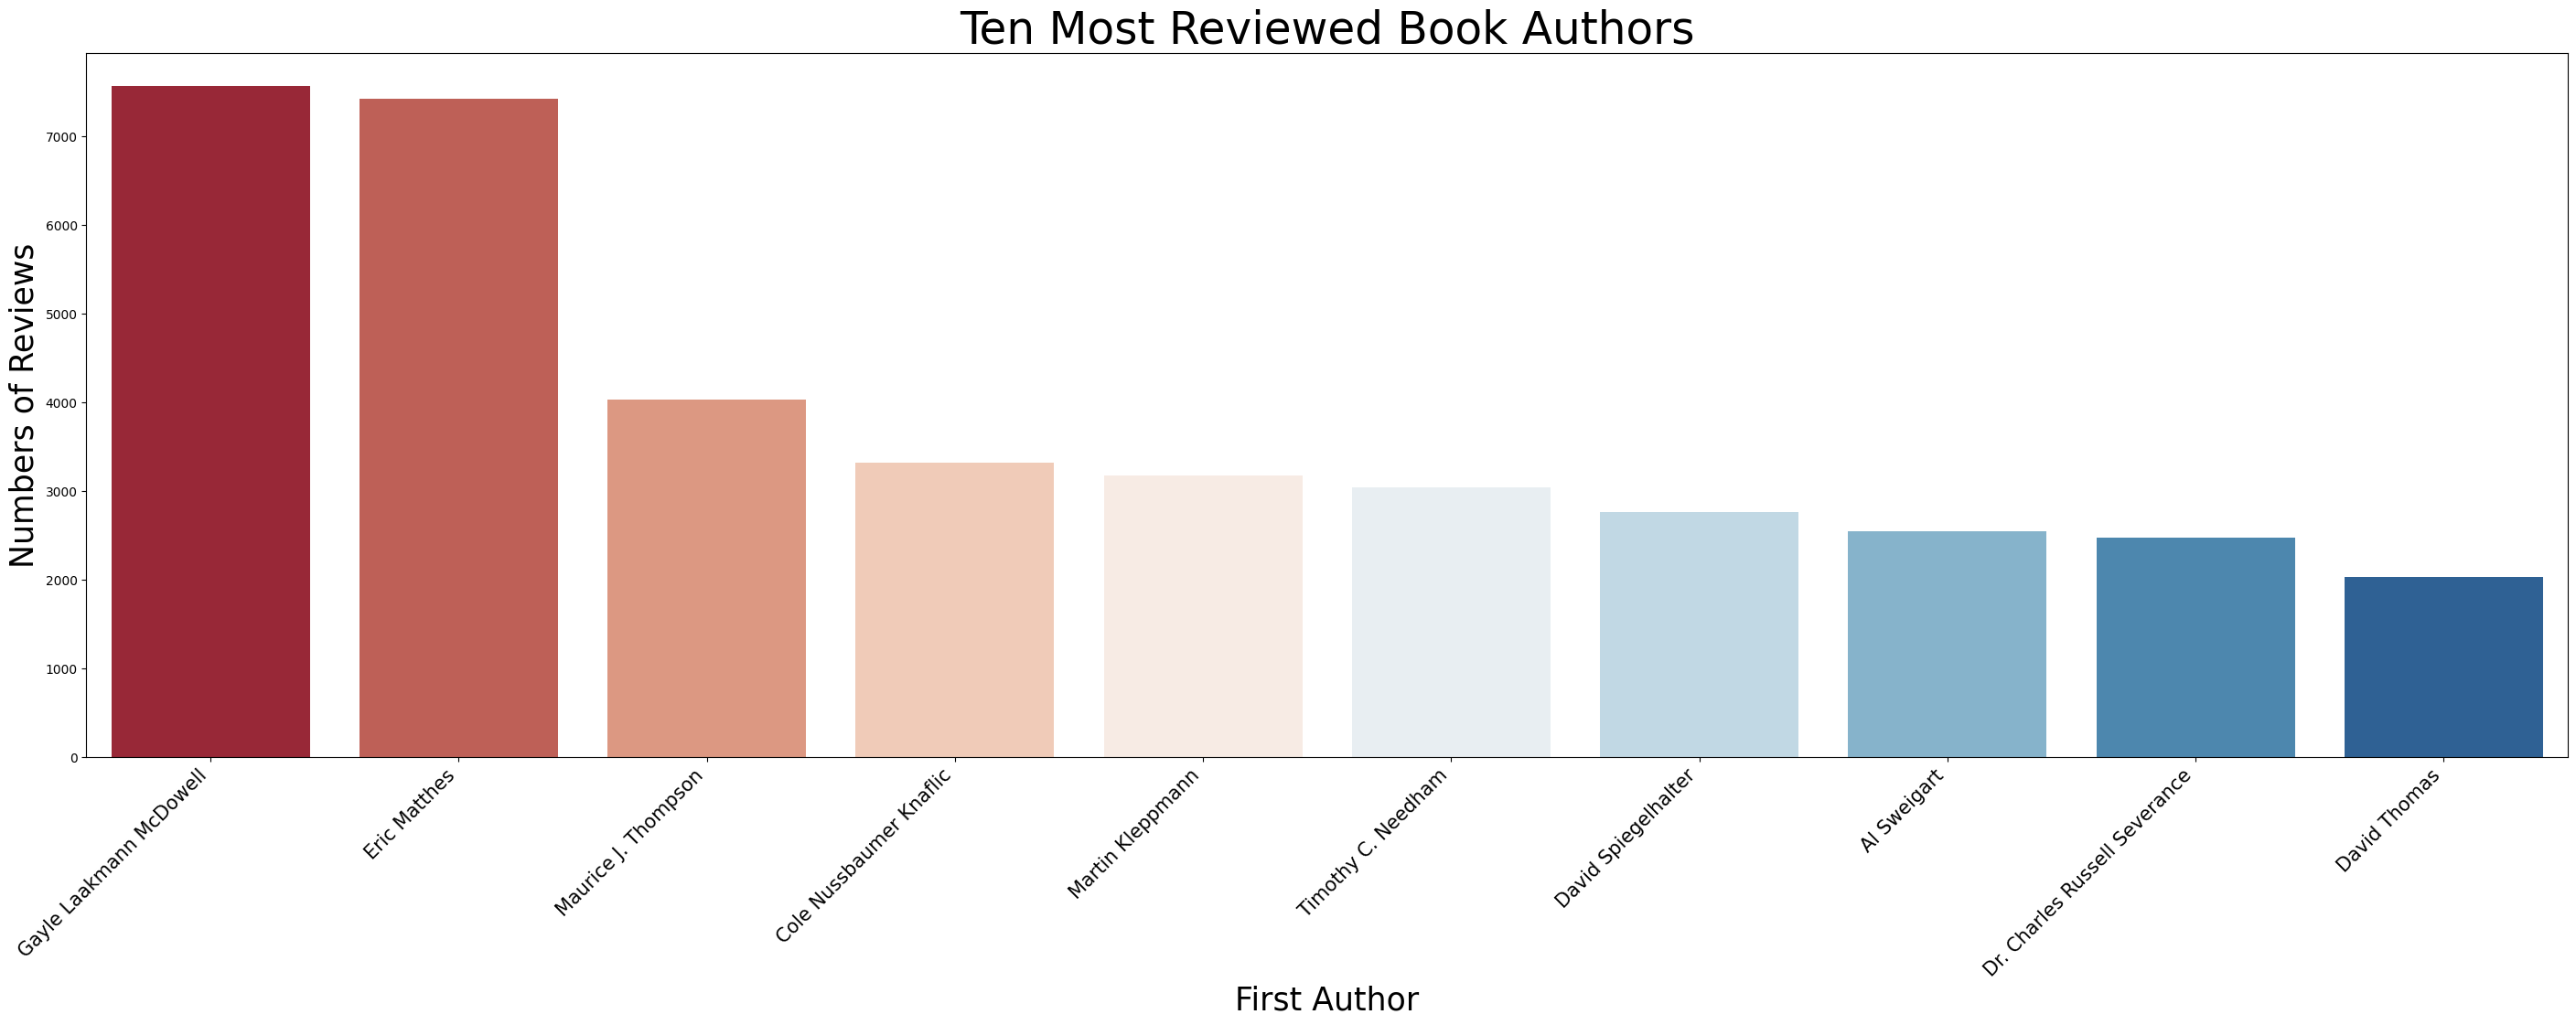

In [30]:
# visualization for top 10 authors based on the reviews
df2 = df1.sort_values(by=['n_reviews'], ascending = False)

top_reviews = df2.head(11)
top_reviews.shape
plt.figure(figsize=(35,10))
chart = sns.barplot(x = '1st_author',
            y = 'n_reviews',
            data = top_reviews,
            palette = "RdBu"
            )
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right', fontsize = 15)
chart.set_yticklabels(chart.get_yticklabels(),fontsize = 15)
plt.title("Ten Most Reviewed Book Authors", fontsize = 35 )
plt.xlabel("First Author", fontsize = 25)
plt.ylabel("Numbers of Reviews",  fontsize = 25)
plt.show()

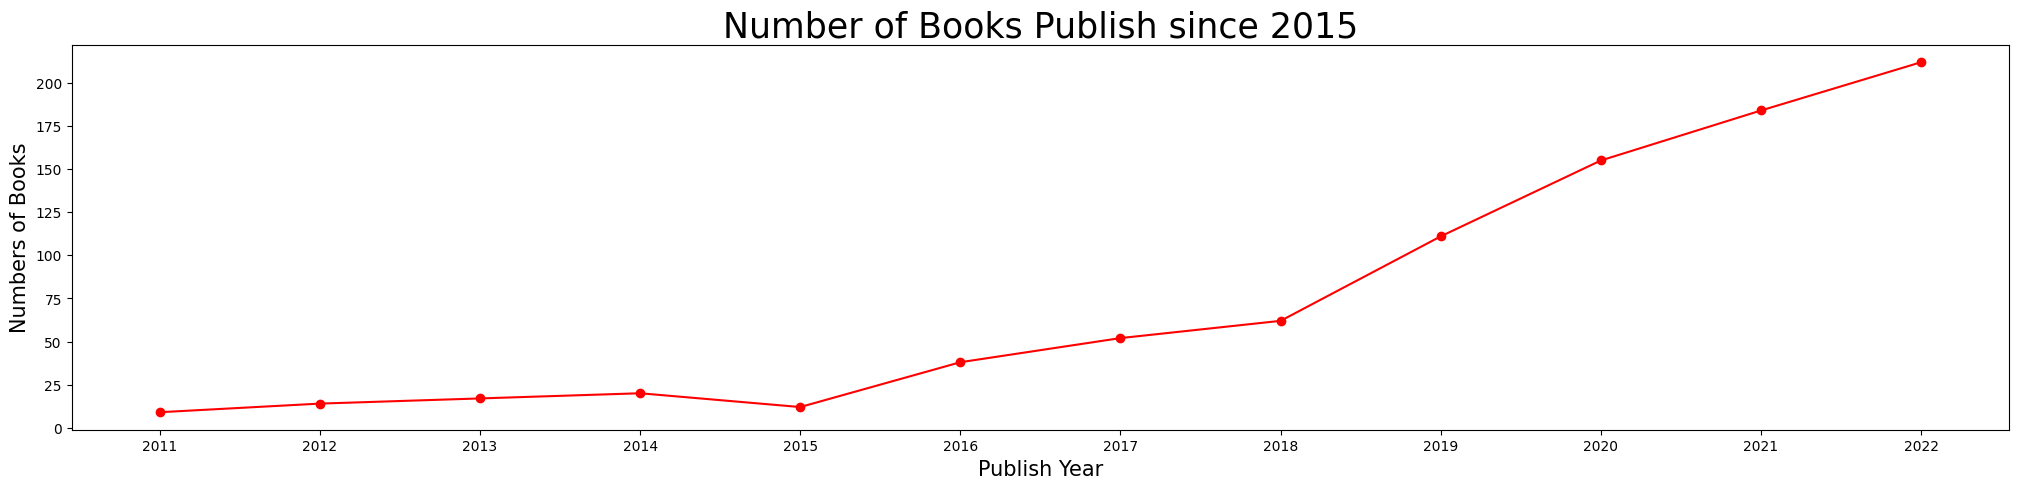

In [34]:
# Books published by years
df2 = df1.groupby('publish_year')['title'].count()
plt.figure(figsize=(25,5))
plt.xticks(df2.index)
plt.plot(df2, color = 'red', marker = "o")
plt.title("Number of Books Publish since 2015", fontsize = 25)
plt.xlabel("Publish Year", fontsize = 15)
plt.ylabel("Numbers of Books", fontsize = 15)
plt.show()

   publish_year  price
0          2021  24.49
1          2021  26.00
2          2022  50.76
3          2022  44.80
4          2013  36.99
5          2019  45.22
6          2020  24.88
7          2022  28.49
8          2022  69.99
9          2018   9.61


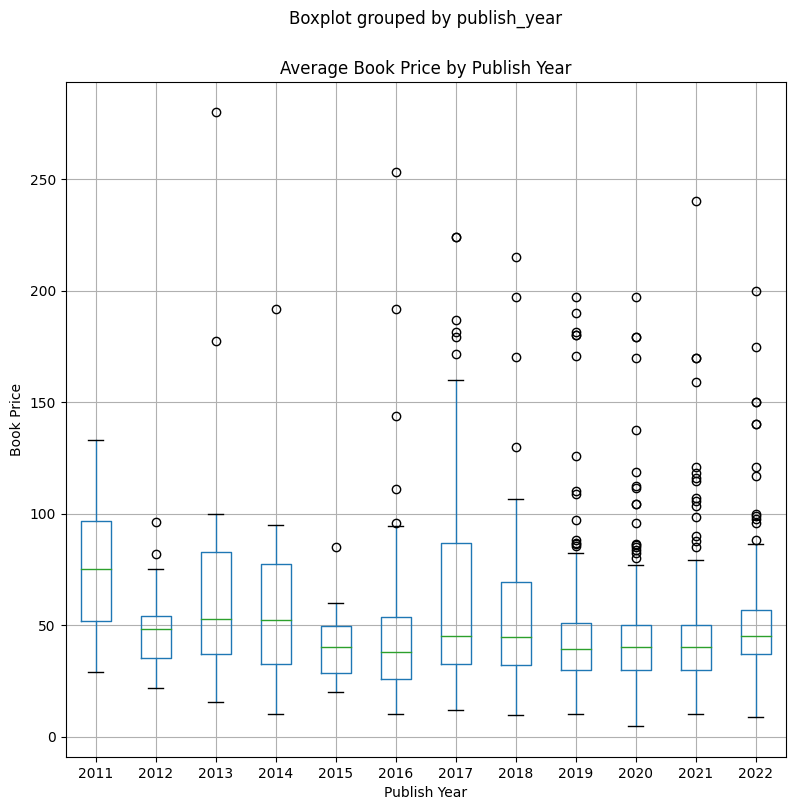

In [272]:
# Chages of Average book price over time
df3 = df1[["publish_year", "price"]]
print(df3.head(10))
df3.boxplot(column='price', by='publish_year', figsize=(9,9), vert = 1)
plt.xlabel("Publish Year")
plt.ylabel("Book Price")
plt.title("Average Book Price by Publish Year")
plt.show()
# from 2015 the average price remains somewhere around $50 but there are a lot of outliers also

C:\Users\Nushr\AppData\Local\Temp\ipykernel_12680\71694451.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()
C:\Users\Nushr\AppData\Local\Temp\ipykernel_12680\71694451.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df1.corr(),vmin = -1, vmax = 1, annot = True)


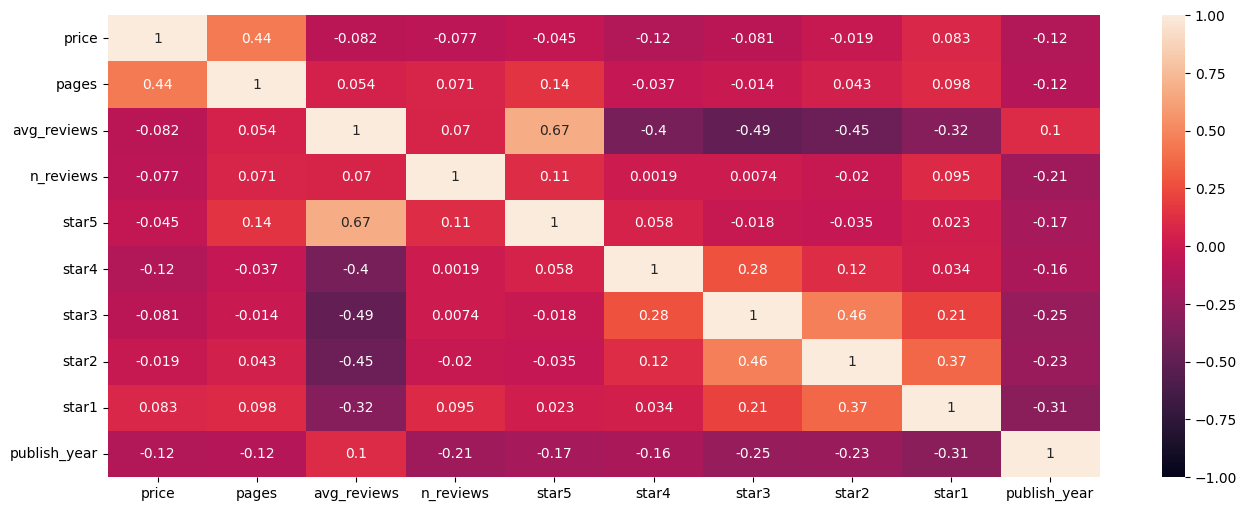

In [155]:
# heatmap to show any correlation between the variables, not any strong relaiton found
import seaborn as sns
df1.corr()
plt.figure(figsize=(16, 6))
#plotting the heatmap for correlation
ax = sns.heatmap(df1.corr(),vmin = -1, vmax = 1, annot = True)

Text(0.5, 1.0, 'Total Page Vs. Number of Reviews')

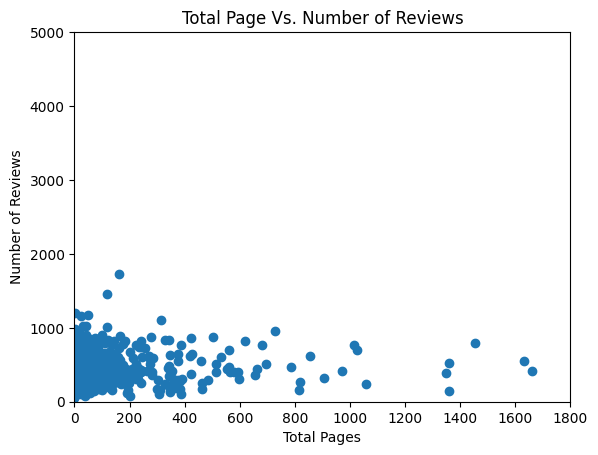

In [130]:
# Scattler plot to show total pages and number of reviews 
# Looks like books with 
plt.scatter(df1.n_reviews, df1.pages)
plt.ylim(0,5000)
plt.xlim(0,1800)
plt.ylabel("Number of Reviews")
plt.xlabel("Total Pages")
plt.title("Total Page Vs. Number of Reviews")